In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.linalg import svd
from functions import *
from get_estimated_covariance import *
import scipy.stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
n = 500
r = 3
N = 1000
delta = 0.7
delta2 = 0.6
t = np.linspace(0,1,N)
sds = np.array([1.5,0.55,0.02]).reshape(r,1)

In [3]:
def mu(t):
    return np.zeros(t.shape)

In [4]:
def g(x,n):
    if n == 0:
        return np.array([1]* len(x))
    else:
        return np.sin(2*n * np.pi * x)

In [5]:
def X(t,rv):
    return np.sum(np.multiply(np.repeat(rv,N).reshape(r,N),np.array([g(t,i) for i in range(r)])),axis = 0)

In [6]:
realK = get_real_cov(sds,N,g,t)

In [7]:
data = generate_data(n, r, t, X, mu, sds)

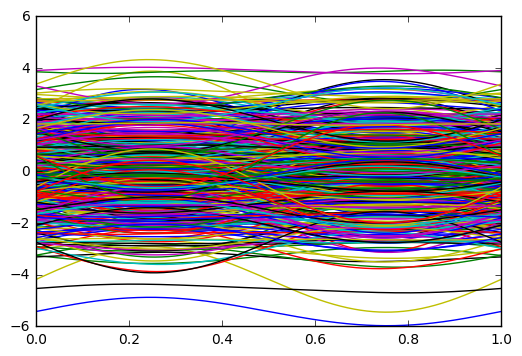

In [8]:
for i in range(n):
    plt.plot(t,data[i])

In [9]:
bounds, bounds2 = get_bounds(delta=delta, N=N, n=n)

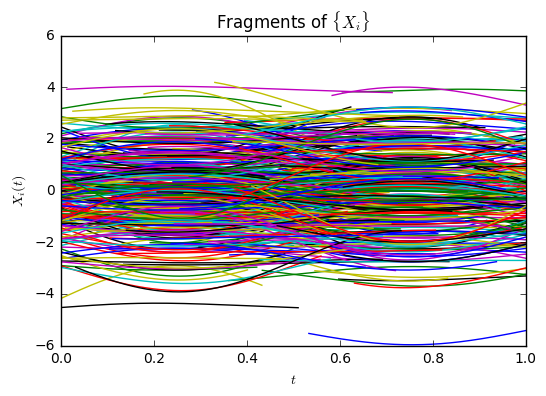

In [10]:
for i in range(n):
    plt.plot(t[bounds[i][0]:bounds[i][1]],data[i][bounds[i][0]:bounds[i][1]])
plt.title('Fragments of $\{X_i\}$')
plt.xlabel('$t$')
plt.ylabel('$X_i(t)$')

In [11]:
estmu = np.array([hmu(data,i,bounds) for i in range(N)])

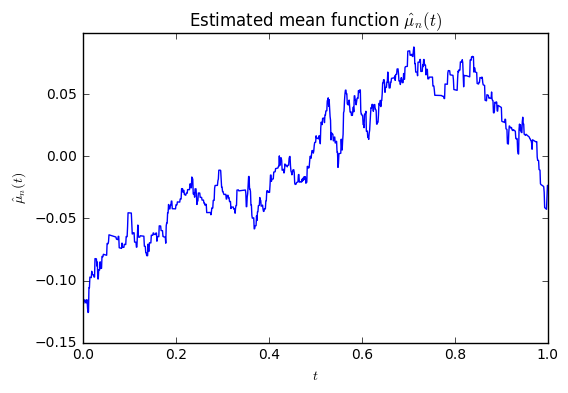

In [12]:
plt.plot(t,estmu)
plt.title('Estimated mean function $\hat{\mu}_n(t)$')
plt.xlabel('$t$')
plt.ylabel('$\hat{\mu}_n(t)$')

In [13]:
est_cov = get_estimated_covariance(data,r,delta,delta2,bounds,bounds2)

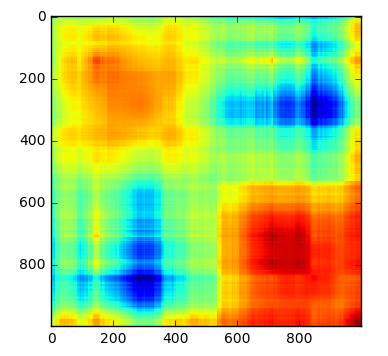

In [18]:
plt.imshow(est_cov)

In [19]:
cov_ob = est_cov[bounds[1][0]:bounds[1][1],bounds[1][0]:bounds[1][1]]

In [20]:
mask_miss = np.ix_(np.append(np.arange(bounds[1][0]), np.arange(bounds[1][1],N)),
                   np.arange(bounds[1][0],bounds[1][1]))
cov_miss = est_cov[mask_miss]

In [21]:
recov = cov_miss @ np.linalg.inv(cov_ob + 10*np.eye(cov_ob.shape[0])) @ (data[1]-estmu)[bounds[1][0]:bounds[1][1]]

In [22]:
new_pred = np.zeros(N)
new_pred[bounds[1][0]:bounds[1][1]] = data[1][bounds[1][0]:bounds[1][1]]
new_pred[np.append(np.arange(bounds[1][0]), np.arange(bounds[1][1],N))] = recov + estmu[np.append(np.arange(bounds[1][0]), np.arange(bounds[1][1],N))]

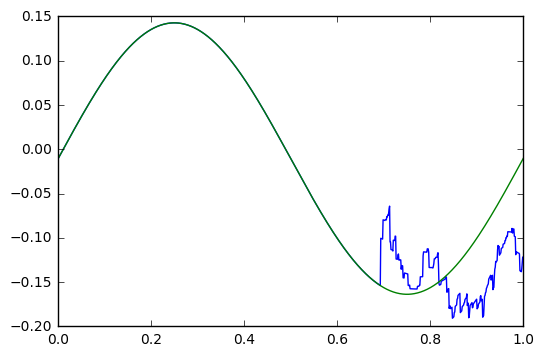

In [23]:
plt.plot(t, new_pred)
plt.plot(t,data[1])